In [1]:
import numpy as np
import collections
import os
import pickle

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression
from gradvi.inference import Trendfiltering
from mrashpen.inference.mrash_wrapR import MrASHR

In [4]:
np.random.seed(100)

n  = np.power(2, 14)
degree = 0
nknots = 10
strue  = 0.1
knots  = np.linspace(0, 1, nknots+2)[1:-1]

In [6]:
x = np.linspace(0, 1, n)
data = dict()
i = 0
data[i] = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                signal = "normal", seed = 100,
                include_intercept = False)

16384


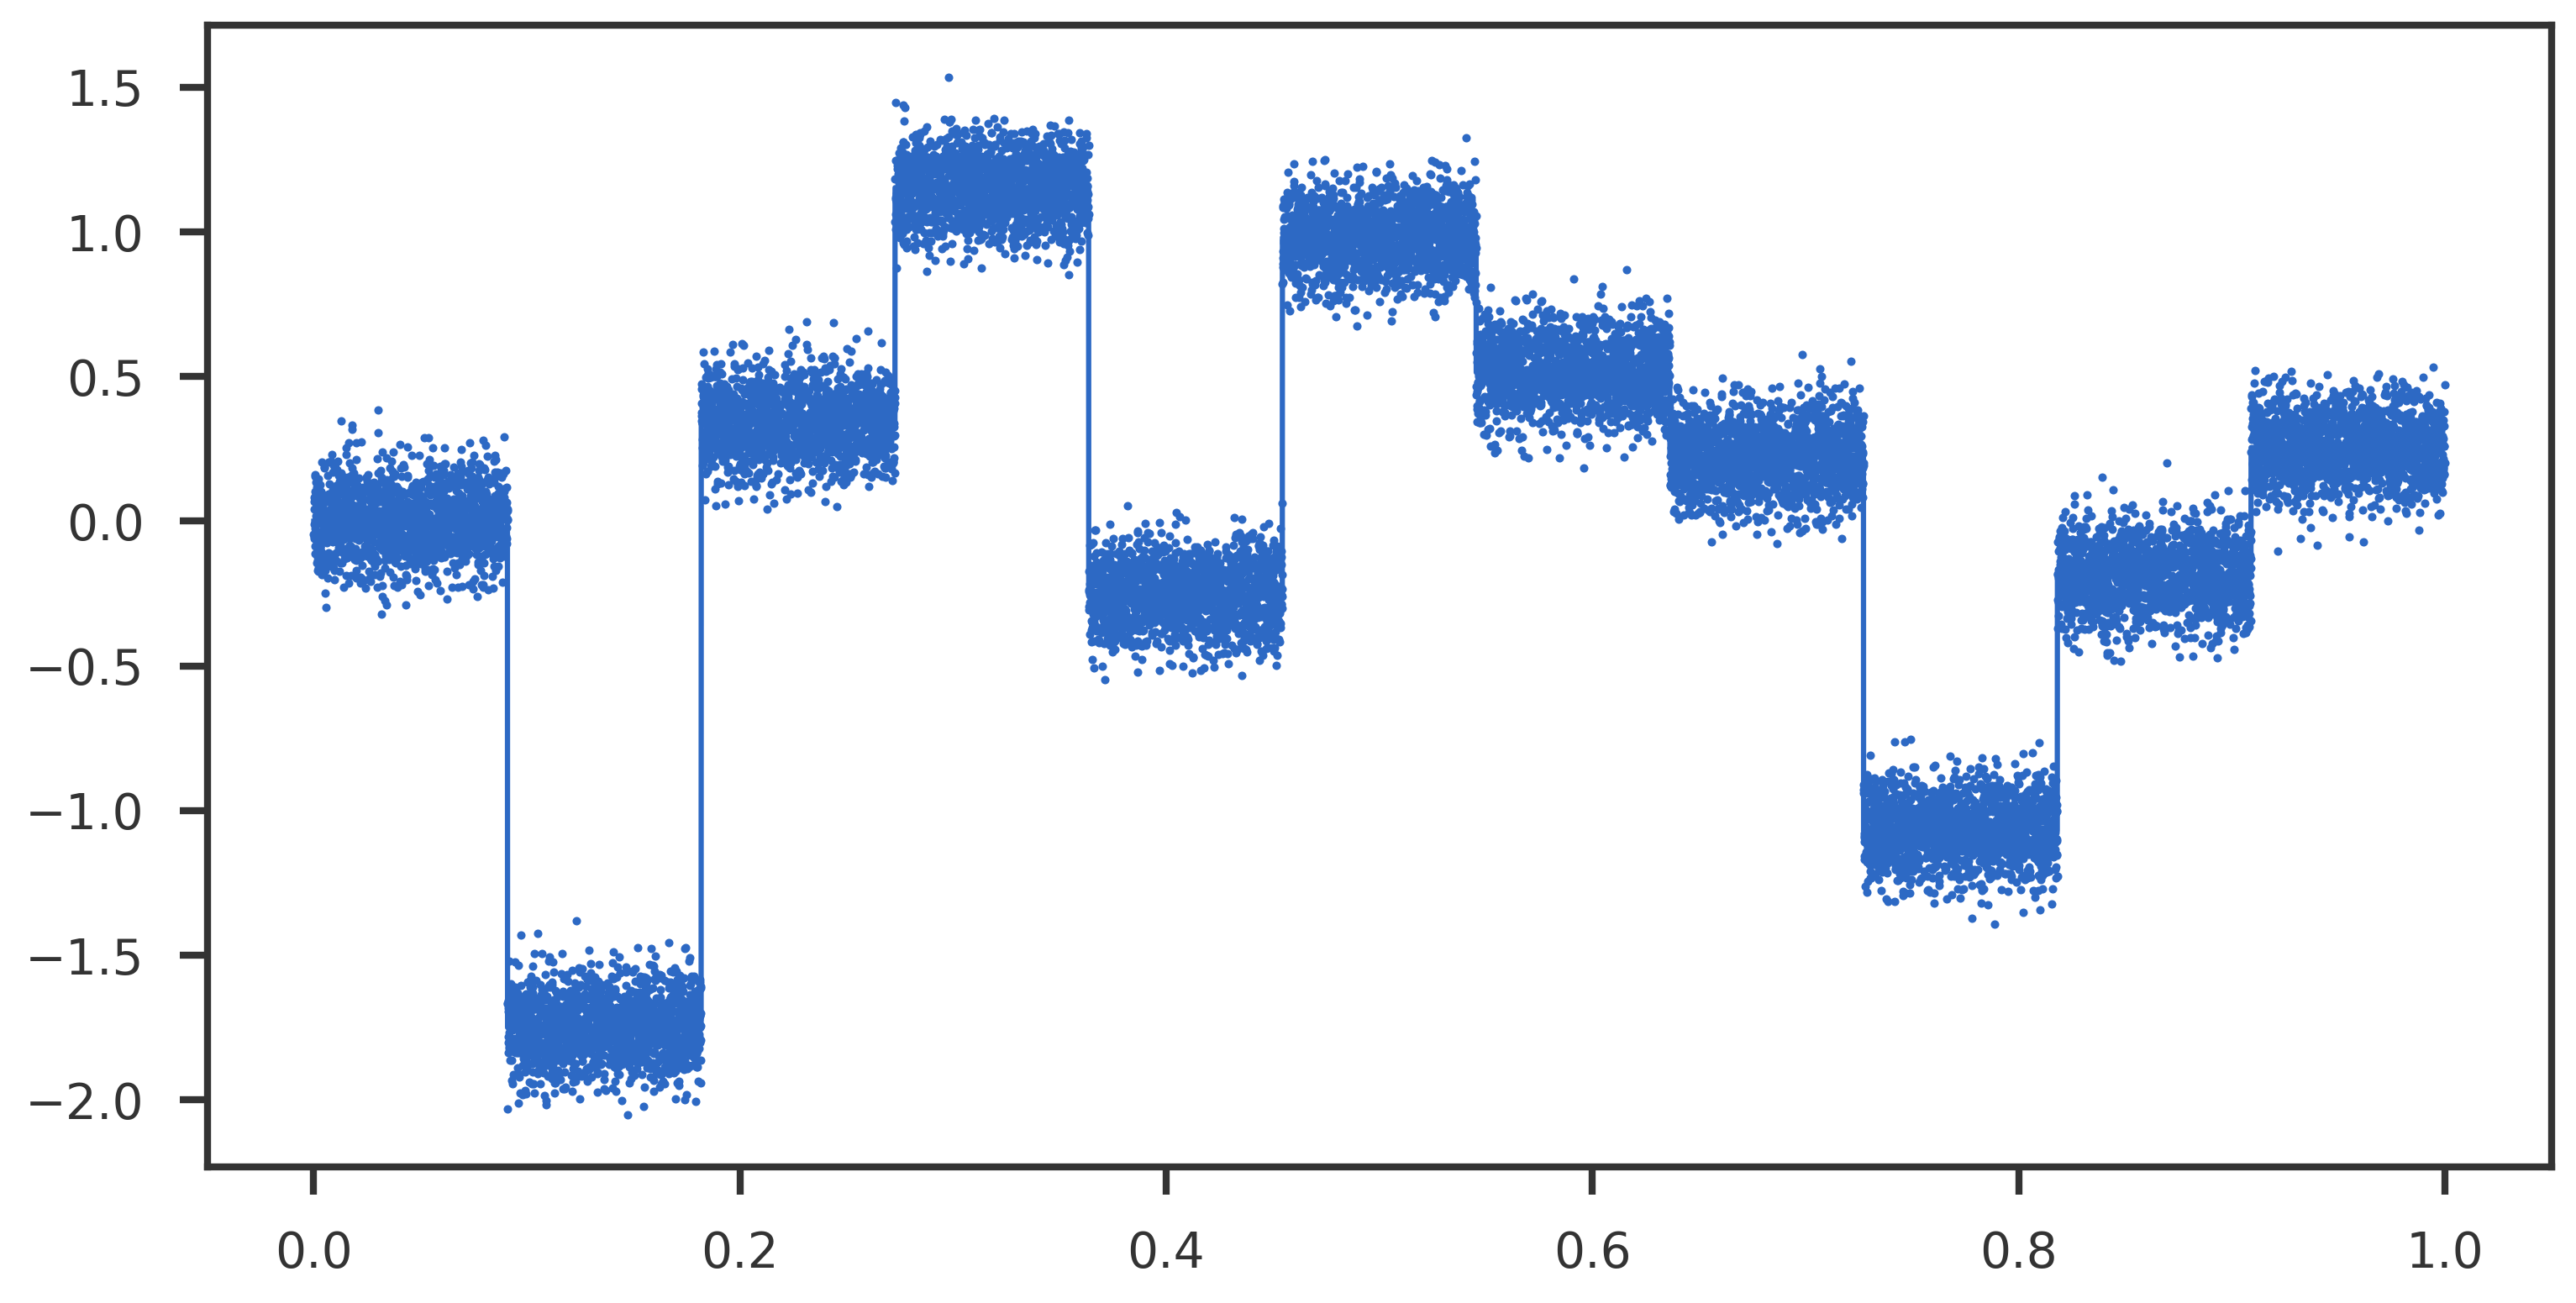

In [7]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)


print(data[i].y.shape[0])
ax1.scatter(data[i].x, data[i].y, s = 2)
ax1.plot(data[i].x, data[i].ytrue)
plt.show()

In [8]:
prior = toy_priors.get_ash(k = 20, sparsity = 0.9, skbase = 20)

In [9]:
itrtime = dict()
tottime = dict()

In [11]:
gvtf = Trendfiltering(maxiter = 1000, scale_basis = False)
gvtf.fit(data[i].y, degree, prior)
itrtime['gradvi_tf'] = gvtf._res.optim_time / gvtf.nfev
print(f"GradVI used {gvtf.nfev} function evaluations.")
print (n, itrtime['gradvi_tf'], gvtf._res.optim_time)

GradVI used 1322 function evaluations.
16384 0.07236298292018642 95.66386342048645


16384


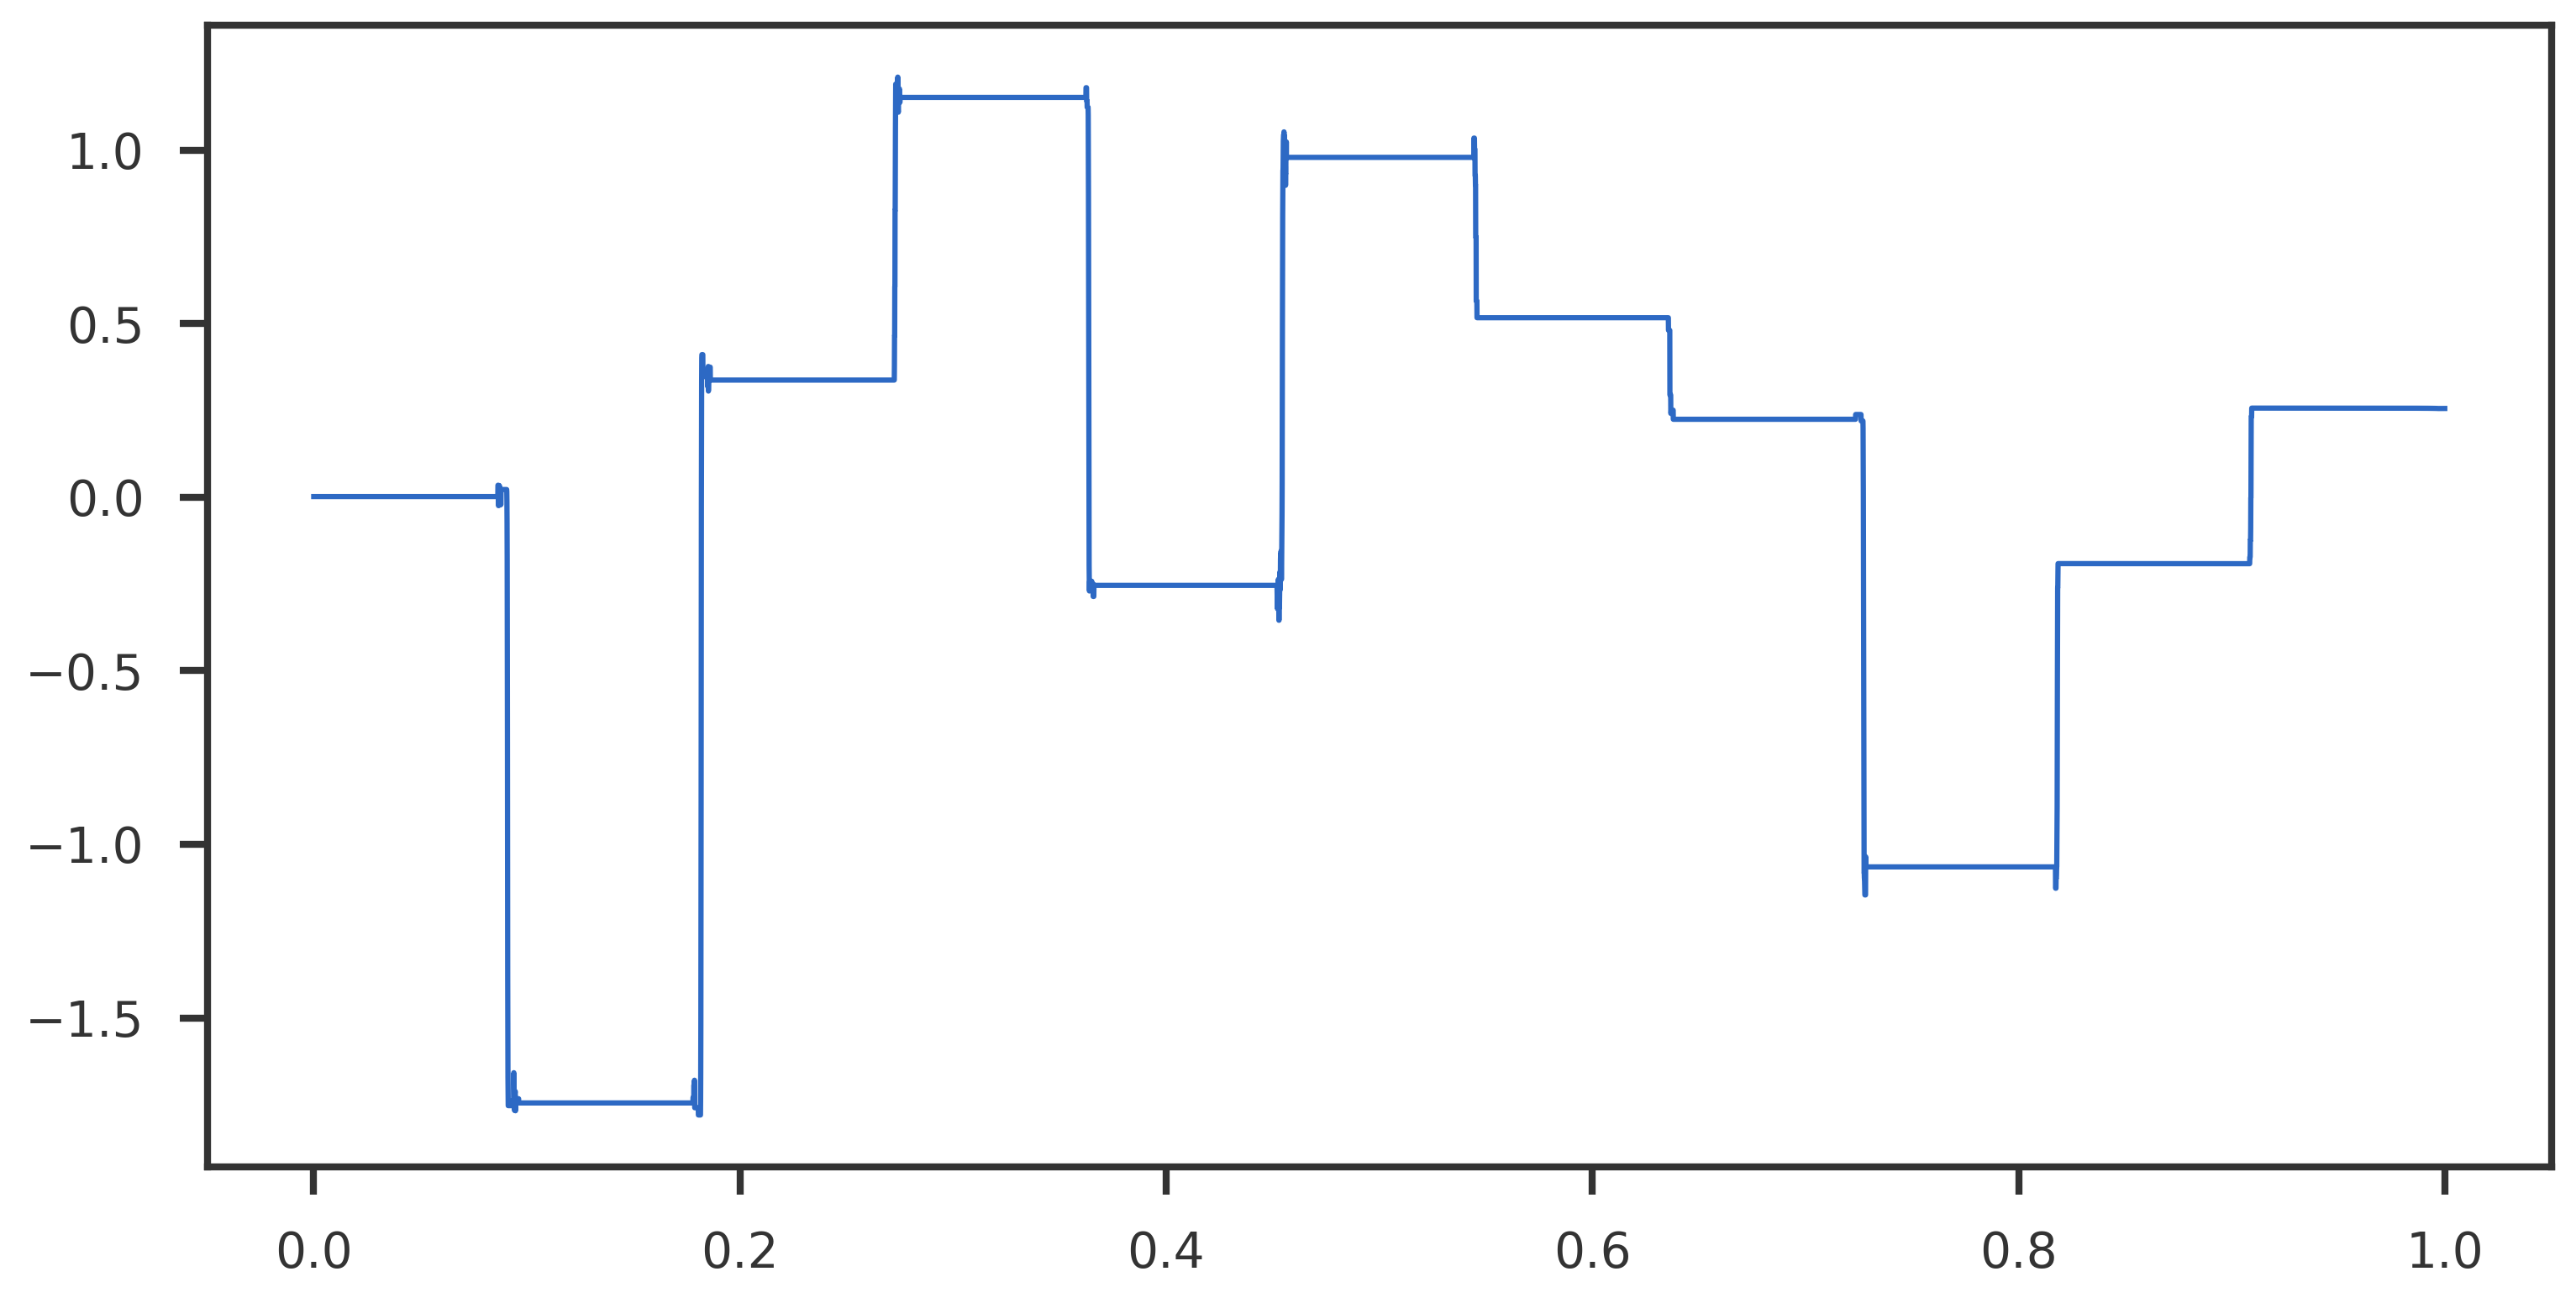

In [14]:
cavi = MrASHR(option = "rds", debug = False)
cavi.fit(data[i].H, data[i].y, prior.sk, winit = prior.w, binit = np.zeros(n), maxiter = 1000)
itrtime['cavi'] = cavi.fitobj['run_time'] / cavi.niter
print(f"CAVI used {cavi.niter} iterations.")
print(n, itrtime['cavi'])

2023-04-07 14:21:49,428 | mrashpen.inference.mrash_wrapR | INFO | Mr.ASH terminated at iteration 1000.

CAVI used 1000 iterations.
16384 0.5122929866313934


In [24]:
gvtf.niter

1000

In [16]:
cavi.coef

array([[ 0.00000000e+00],
       [ 1.44282793e-05],
       [ 2.68587543e-07],
       ...,
       [ 4.04003545e-05],
       [ 3.56847303e-05],
       [-1.73265005e-05]])

In [17]:
cavi_ypred = np.dot(data[i].H, cavi.coef) + cavi.intercept

In [20]:
print (f"Total time taken by Gradvi: {gvtf._res.optim_time}")
print (f"Total time taken by CAVI: {cavi.fitobj['run_time']}")

Total time taken by Gradvi: 95.66386342048645
Total time taken by CAVI: 512.2929866313934


16384


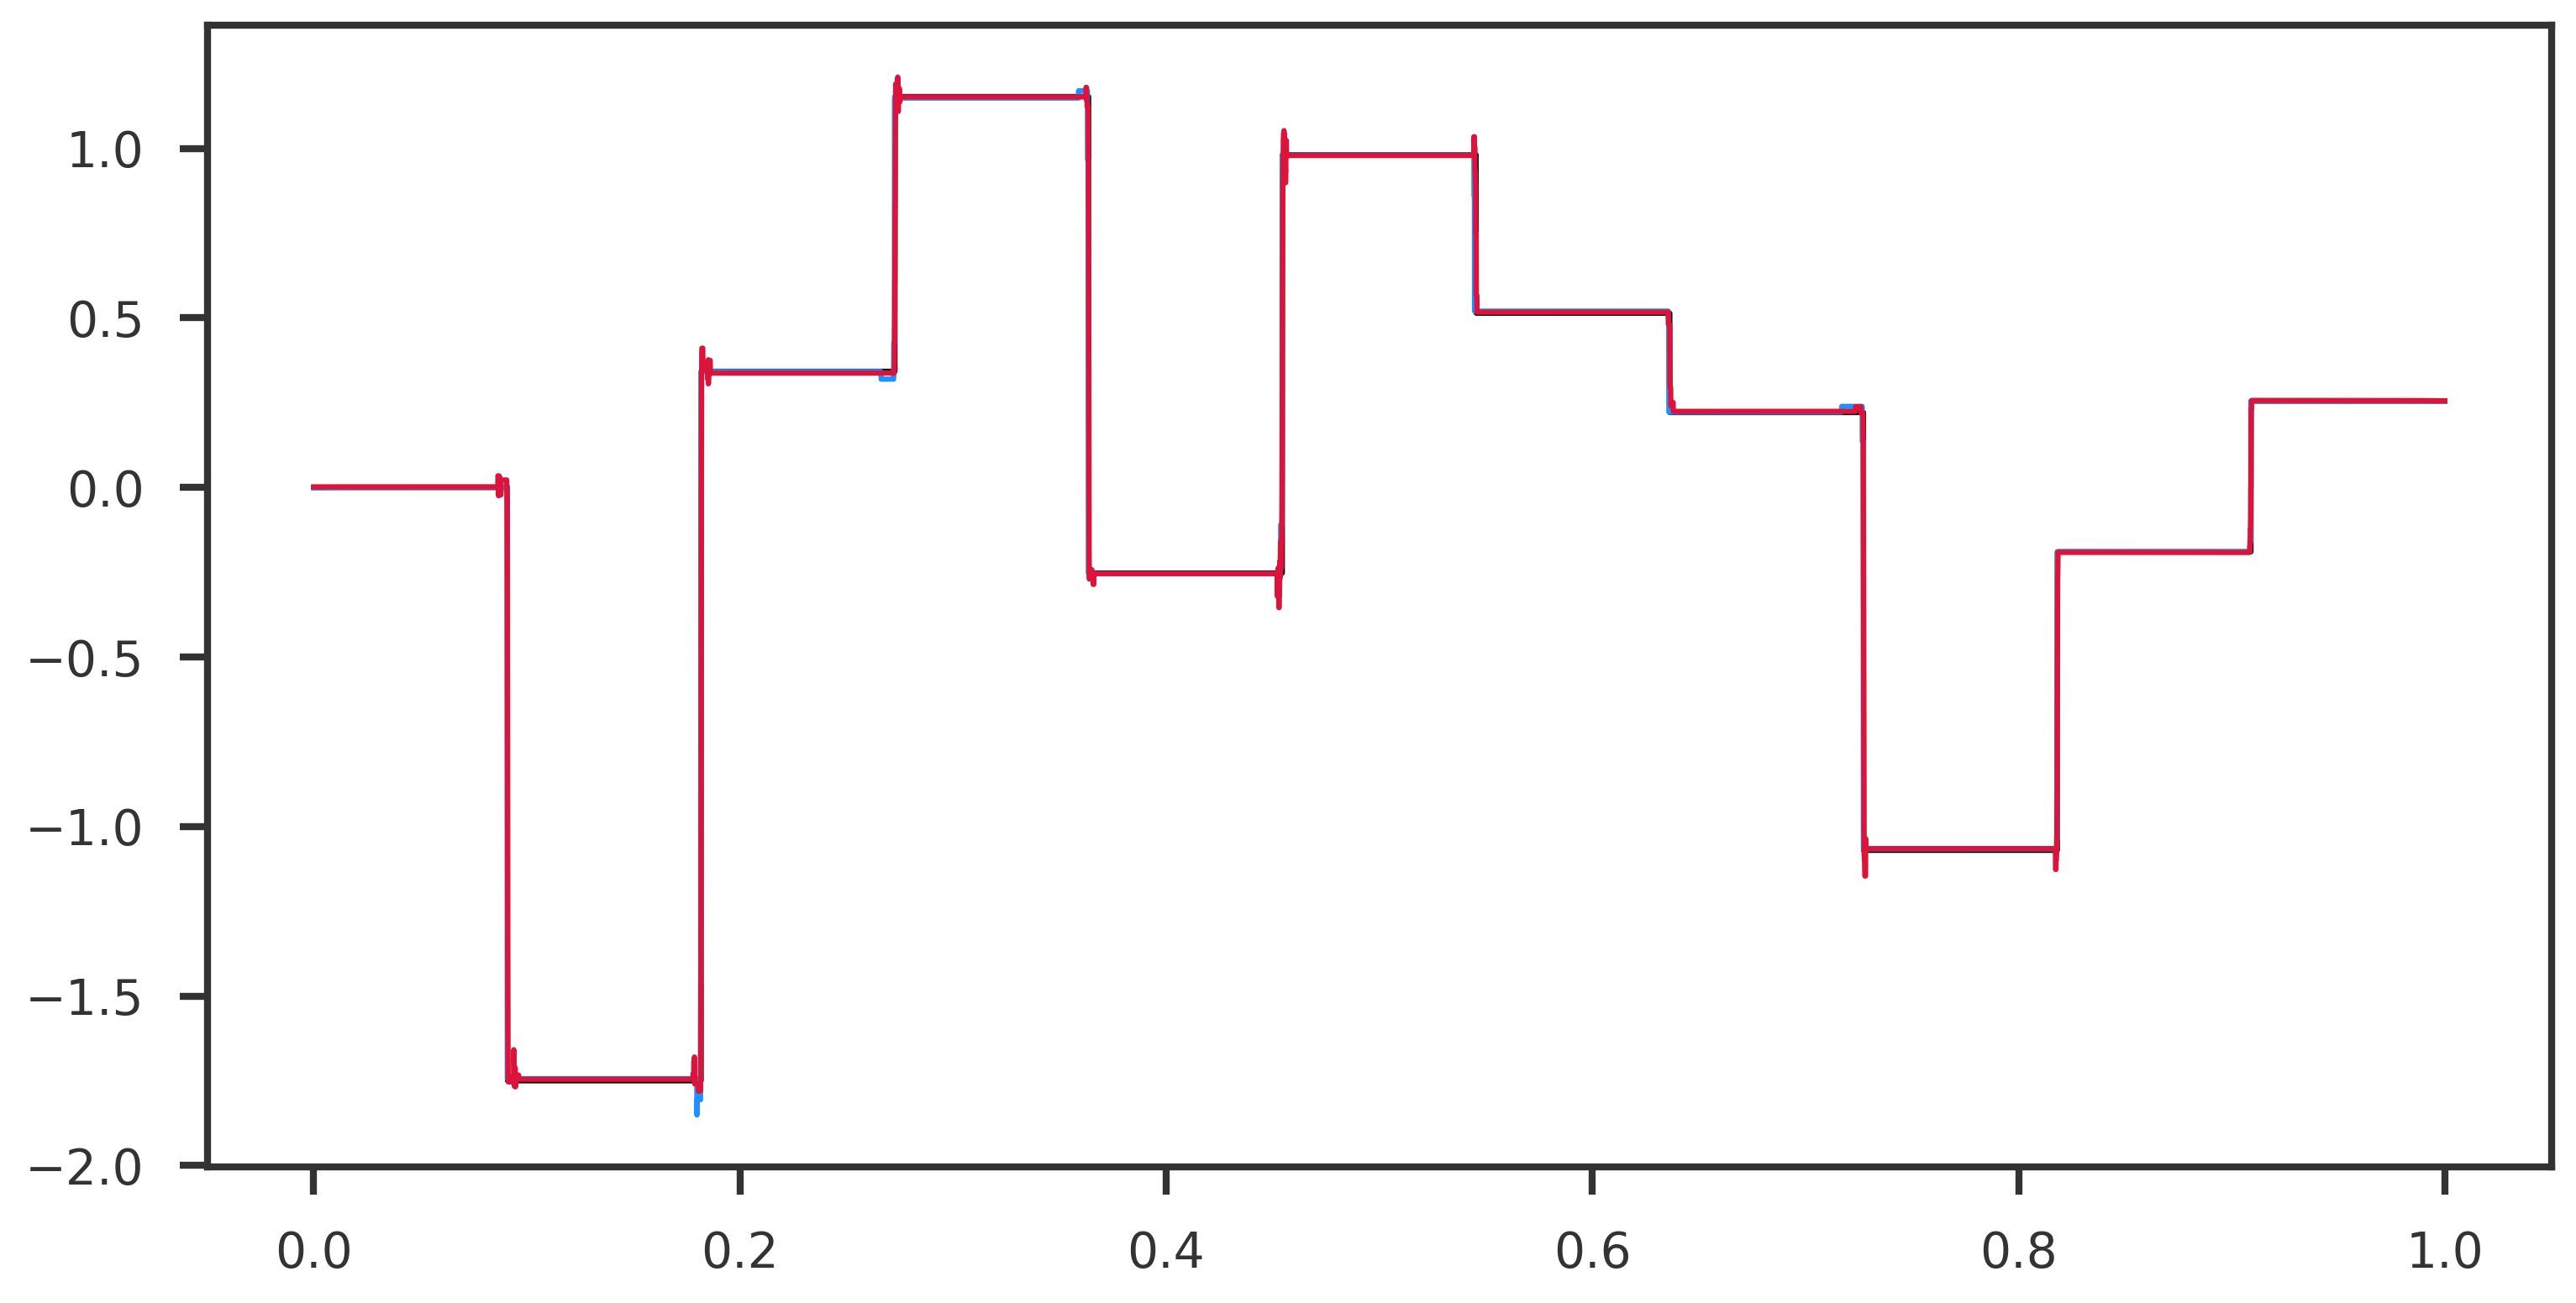

In [22]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)

print(data[i].y.shape[0])
#ax1.scatter(data[i].x, data[i].y, s = 2, alpha = 0.5)
ax1.plot(data[i].x, data[i].ytrue, label = 'True', color = 'black')
ax1.plot(data[i].x, cavi_ypred, label = 'CAVI', color = 'dodgerblue')
ax1.plot(data[i].x, gvtf.ypred, label = 'GradVI', color = 'crimson')

plt.show()

In [26]:
from mrashpen.utils import R_trendfilter
import time

In [28]:
st = time.time()

tf_y, tf_fit = R_trendfilter.fit(data[i].y, order = degree)

et = time.time()
elapsed_time = et - st
print("Total time taken by genlasso:", elapsed_time)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



R[write to console]: Loading required package: Matrix



Total time taken by genlasso: 141.58593654632568


In [ ]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)

print(data[i].y.shape[0])
#ax1.scatter(data[i].x, data[i].y, s = 2, alpha = 0.5)
ax1.plot(data[i].x, data[i].ytrue, label = 'True', color = 'black')
ax1.plot(data[i].x, cavi_ypred, label = 'CAVI', color = 'dodgerblue')
ax1.plot(data[i].x, gvtf.ypred, label = 'GradVI', color = 'crimson')
ax1.plot(data[i].x, tf_)

plt.show()